<a href="https://colab.research.google.com/github/rafsanalhad/PCVK_17_Harafsan_Alhad/blob/main/Week7_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Membuat fungsi konvulsi tanpa library

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import library yang dibutuhkan

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

# Fungsi konvulsi tanpa library

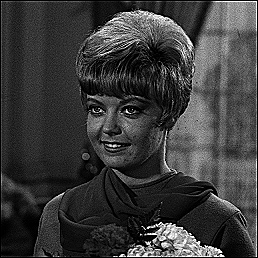

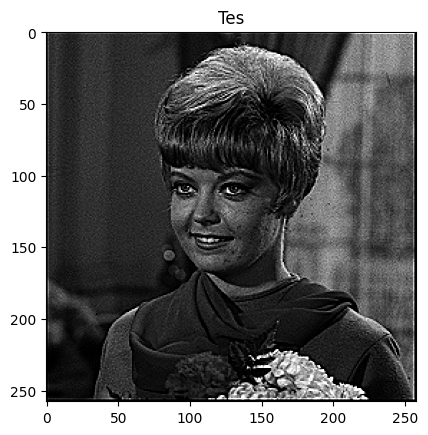

In [4]:
# Fungsi untuk memuat citra dari drive dan mengubahnya ke grayscale
def load_image_from_drive(image_path):
    img = im.open(image_path).convert('L')  # Konversi ke grayscale ('L')
    img_array = np.array(img)
    return img_array

# Fungsi konvolusi
def convolution2d(image, kernel, stride, padding):
    h, w = image.shape
    kh, kw = kernel.shape

    if padding > 0:
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        image_padded = image

    padded_h, padded_w = image_padded.shape
    out_h = (padded_h - kh) // stride + 1
    out_w = (padded_w - kw) // stride + 1
    output = np.zeros((out_h, out_w))

    for i in range(0, out_h):
        for j in range(0, out_w):
            region = image_padded[i*stride:i*stride+kh, j*stride:j*stride+kw]
            output[i, j] = np.sum(region * kernel)

    return output

# Path gambar drive
image_path = '/content/gdrive/MyDrive/PCVK/female.tiff'

# Gunakan fungsi load image
image = load_image_from_drive(image_path)

# Contoh Kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Aplikasikan konvolusi
output = convolution2d(image, kernel, 1, 2)

# Tampilkan hasil
cv2_imshow(output)

plt.imshow(output, cmap='gray', vmin=0, vmax=255)
# cmap untuk menentukan skala warna yang digunakan
# vmin dan vmax untuk membatasi intensitas warna dalam rentang tertentu
plt.title('Tes')
plt.show()

# Daftar Kernel

In [5]:
# Kernel Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

# Kernel Emboss
emboss = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]])

# Kernel Left Sobel Edge Detection
lsed = np.array([[1, 0, -1],
                 [2, 0, -2],
                 [1, 0, -1]])

# Kernel Canny Edge Detection
ced = np.array([[-1, -1, -1],
                [-1, 8, -1],
                [-1, -1, -1]])

# Kernel Prewitt Edge Detection
ped = np.array([[-1, -1, -1],
                [0, 0, 0],
                [1, 1, 1]])

# Kernel 5 x 5 Gaussian Blur
gaus5x5 = np.array([[1,  4,  6,  4,  1],
                    [4, 16, 24, 16,  4],
                    [6, 24, 36, 24,  6],
                    [4, 16, 24, 16,  4],
                    [1,  4,  6,  4,  1]]) / 256

# Kernel 21 x 21 Gaussian Blur
kernel_size = 21 # Ukuran kernel Gaussian

sigma = math.sqrt(kernel_size) # Hitung sigma (standar deviasi) berdasarkan ukuran kernel

gaussian_kernel_1d = cv.getGaussianKernel(kernel_size, sigma) # Dapatkan kernel Gaussian 1D menggunakan cv.getGaussianKernel

gaussian_kernel_2d = gaussian_kernel_1d @ gaussian_kernel_1d.T # Buat kernel Gaussian 2D dengan mengalikan kernel 1D dengan transposenya

gaus21x21 = gaussian_kernel_2d

# 1. Sharpen

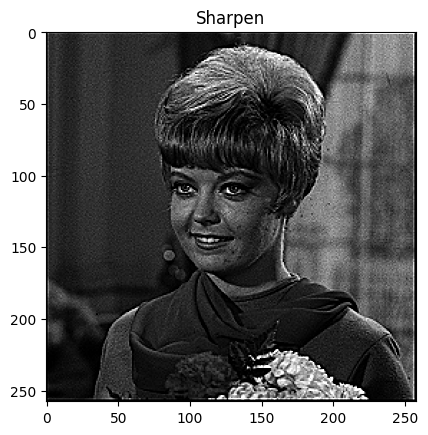

In [6]:
# Aplikasikan konvolusi
output_sharpen = convolution2d(image, sharpen, 1, 2)

# Tampilkan hasil
plt.imshow(output_sharpen, cmap='gray', vmin=0, vmax=255)
plt.title('Sharpen')
plt.show()

# 2. Emboss

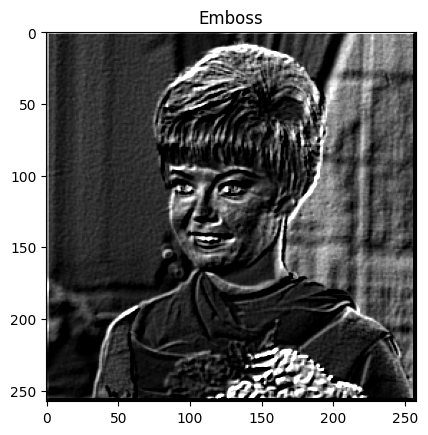

In [7]:

# Aplikasikan konvolusi
output_emboss = convolution2d(image, emboss, 1, 2)

# Tampilkan hasil
plt.imshow(output_emboss, cmap='gray', vmin=0, vmax=255)
plt.title('Emboss')
plt.show()


# 3. Left Sobel Edge Detection

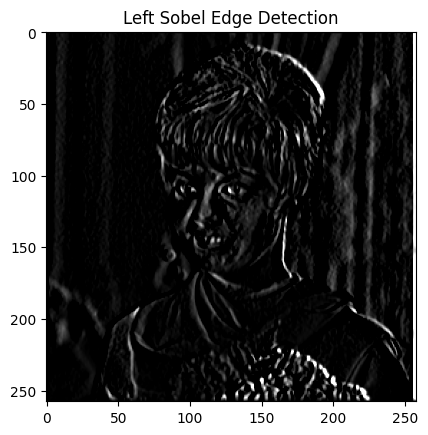

In [8]:
# Aplikasikan konvolusi
output_lsed = convolution2d(image, lsed, 1, 2)

# Tampilkan hasil
plt.imshow(output_lsed, cmap='gray', vmin=0, vmax=255)
plt.title('Left Sobel Edge Detection')
plt.show()


# 4. Canny Edge Detection

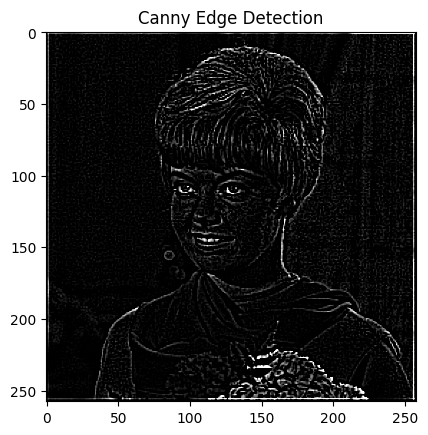

In [9]:

# Aplikasikan konvolusi
output_ced = convolution2d(image, ced, 1, 2)

# Tampilkan hasil
plt.imshow(output_ced, cmap='gray', vmin=0, vmax=255)
plt.title('Canny Edge Detection')
plt.show()


# 5. Prewitt Edge Detection

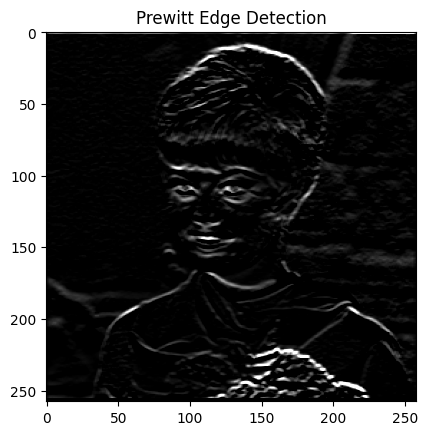

In [10]:
# Aplikasikan konvolusi
output_ped = convolution2d(image, ped, 1, 2)

# Tampilkan hasil
plt.imshow(output_ped, cmap='gray', vmin=0, vmax=255)
plt.title('Prewitt Edge Detection')
plt.show()

# 6. 5 x 5 Gaussian Blur

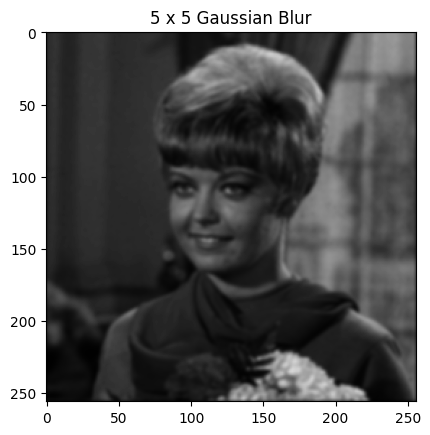

In [11]:
# Aplikasikan konvolusi
output_gaus5x5 = convolution2d(image, gaus5x5, 1, 2)

# Tampilkan hasil
plt.imshow(output_gaus5x5, cmap='gray', vmin=0, vmax=255)
plt.title('5 x 5 Gaussian Blur')
plt.show()


# 7. 21 x 21 Gaussian Blur

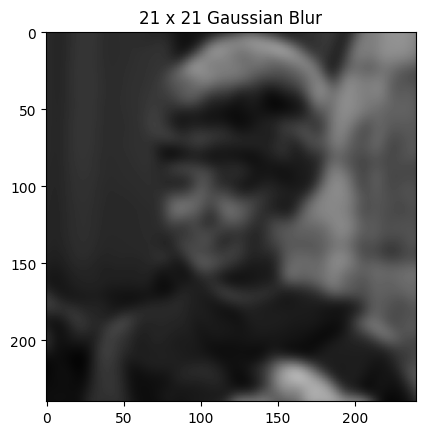

In [12]:
# Aplikasikan konvolusi
output_gaus21x21 = convolution2d(image, gaus21x21, 1, 2)

# Tampilkan hasil
plt.imshow(output_gaus21x21, cmap='gray', vmin=0, vmax=255)
plt.title('21 x 21 Gaussian Blur')
plt.show()
